In [1]:
from Carga import Carga
from pandas import pandas as pd
import numpy as np
import unidecode

In [2]:
engine = Carga.db_engine()
dt = pd.DataFrame()

# Full Database & Normalization

In [7]:
sql = """select distinct "Processo", "Beneficiário", "Modalidade", "Sexo", "Instituição Origem", "Sigla UF Origem", "Programa CNPq", "Grande Área", "Área", "Subárea", sum("Valor Pago") 
from pagamentos
where ("Modalidade" like '%%GDE%%'
    or "Modalidade" like '%%GD%%')
Group by "Processo", "Beneficiário", "Modalidade", "Sexo", "Instituição Origem", "Sigla UF Origem", "Programa CNPq", "Grande Área", "Área", "Subárea"
"""


In [8]:
dt = pd.read_sql(sql, engine)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:
dt

,Processo,Beneficiário,Modalidade,Sexo,Instituição Origem,Sigla UF Origem,Programa CNPq,Grande Área,Área,Subárea,sum
0,101025/2016-5,Fernanda Garcia dos Santos,GD - Doutorado,F,Universidade Federal de São Paulo,SP,PROGRAMA BASICO DE NUTRICAO,Ciências Sociais Aplicadas,Direito,Direito Internacional Público,140076.00
1,120556/2017-0,Zeray Hagos Gebrezabher,GD - Doutorado,M,Universidade de São Paulo,SP,Programa Academia de Ciencias do Terceiro Mund...,Ciências Exatas e da Terra,Matemática,Física Matemática,62256.00
2,120556/2017-0,Zeray Hagos Gebrezabher,GD - Doutorado,None,Universidade de São Paulo,SP,Programa Academia de Ciencias do Terceiro Mund...,Ciências Exatas e da Terra,Matemática,Física Matemática,63303.57
3,121853/2017-9,Suleiman Dauda,GD - Doutorado,M,Universidade Federal de São Carlos,SP,Programa Academia de Ciencias do Terceiro Mund...,Ciências Biológicas,Botânica,Botânica Aplicada,125559.57
4,137634/2017-0,Afonso Filipe Joao,GD - Doutorado,M,Universidade Federal de Uberlândia,MG,Programa Academia de Ciencias do Terceiro Mund...,Ciências Exatas e da Terra,Química,Eletroanalítica,122378.14
...,...,...,...,...,...,...,...,...,...,...,...
64838,290359/2004-0,Francisco Exaltação Trevisan,GDE - Doutorado no Exterior,M,Centro de Engenharia do Petróleo,SP,Comissão Fulbright,Engenharias,Engenharia Mecânica,Mecânica dos Fluídos,139249.81
64839,290360/2017-0,Marcelo Henrique Feitosa de Sousa,GDE - Doutorado no Exterior,M,University of Tübingen,None,DAAD,Ciências da Saúde,Medicina,Neurocirurgia,167382.68
64840,290365/2004-0,Leonardo Pio Perez,GDE - Doutorado no Exterior,M,Banco Central,DF,Comissão Fulbright,Ciências Sociais Aplicadas,Economia,Economia Monetária e Fiscal,208980.25
64841,290377/2004-8,Francisco Carlos de Mattos Brito Oliveira,GDE - Doutorado no Exterior,M,Faculdade Integrada do Ceará,CE,Comissão Fulbright,Ciências Exatas e da Terra,Ciência da Computação,Processamento Gráfico (Graphics),136359.47


In [97]:
subareas = dt[["Sigla UF Origem", "Grande Área"]].groupby("Grande Área").size().to_frame(name = 'count').reset_index()

In [50]:
areas.to_excel("d:/sexo.xlsx")

In [98]:
area_sexo = dt[["Sigla UF Origem", "Grande Área", "sum"]].groupby(["Sigla UF Origem", "Grande Área"]).size().to_frame(name = 'count').reset_index()

In [99]:
areas_sexo = pd.crosstab(dt['Grande Área'],dt['Sigla UF Origem'])

<AxesSubplot:ylabel='Grande Área'>

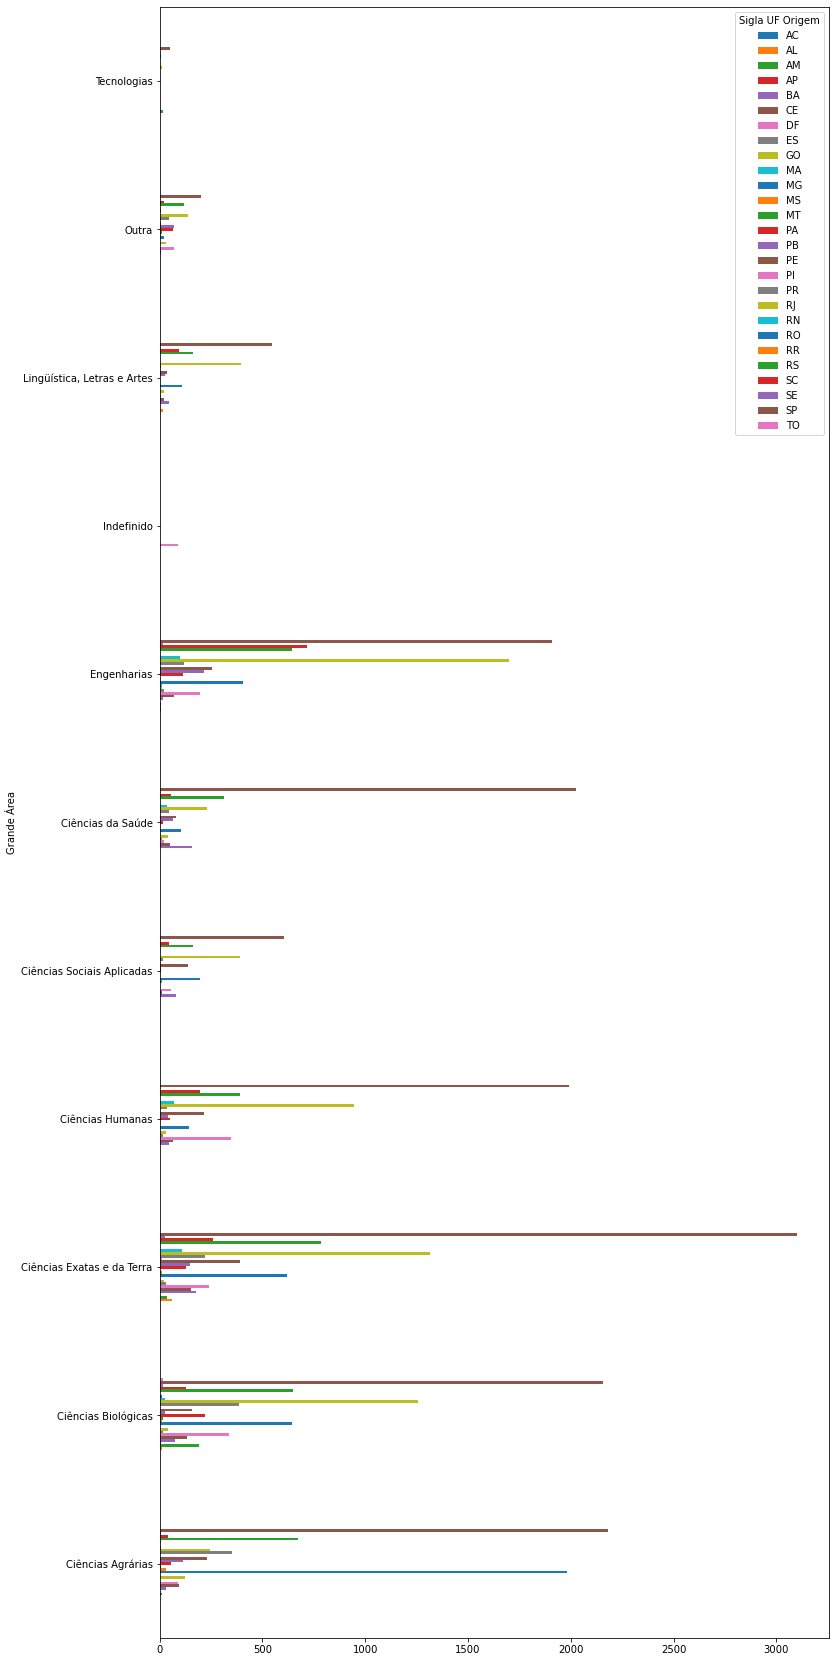

In [107]:
areas_sexo.plot(kind='barh', figsize=(12,30))

In [106]:
areas_sexo.to_excel("d:\estado_area.xlsx")

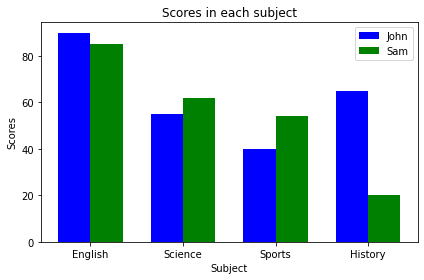

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
marks_john = [90, 55, 40, 65]
marks_sam = [85, 62, 54, 20]

# create plot
fig, ax = plt.subplots()
bar_width = 0.35
X = np.arange(4)

p1 = plt.bar(X, marks_john, bar_width, color='b',
label='John')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + bar_width, marks_sam, bar_width,
color='g',
label='Sam')

plt.xlabel('Subject')
plt.ylabel('Scores')
plt.title('Scores in each subject')
plt.xticks(X + (bar_width/2) , ("English", "Science", 
"Sports", "History"))
plt.legend()

plt.tight_layout()
plt.show()

# Getting partial databases

In [ ]:
financiados = dt[dt.pgtos > 0]

In [ ]:
outros = dt[pd.isnull(dt.pgtos)]

In [ ]:
financiados.id.unique()

## Analisando um ID

In [ ]:
id = 1956141788591551
financiado = financiados[financiados.id == id]
financiado

In [ ]:
financiado.areas_conhecimento.iloc[0].split(',')

In [ ]:
#Pegando Regiões

região = financiado.iloc[0].uf
tipo_região = None
if not região == None:
    if região in ('GO', 'MS', 'MT', 'DF', 'AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE', 'AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'):
        tipo_região = 1
    elif região in ('ES', 'MG', 'RJ', 'SP'):
        tipo_região = 2
    elif região in ('PR', 'RS', 'SC'):
        tipo_região = 3
    


In [ ]:
#Pegando ano do Indicador a ser usado

if financiado.chamada.str.contains('2012', na=False).unique()[0] == True : ano = 2012
elif financiado.chamada.str.contains('2013', na=False).unique()[0] == True : ano = 2013
elif financiado.chamada.str.contains('2014', na=False).unique()[0] == True : ano = 2014
else: ano = None
    
    
#Pegando Faixa do Financiado
    
if financiado.chamada.str.contains('Faixa A', na=False).unique()[0] == True : faixa = 'A'
elif financiado.chamada.str.contains('Faixa B', na=False).unique()[0] == True : faixa = 'B'
elif financiado.chamada.str.contains('Faixa c', na=False).unique()[0] == True : faixa = 'C'
else: faixa = None
    
print (faixa, ano)

In [ ]:
#Pegando Enquadramentos Funcionais Atuais
enquadramento_vinculo = financiado.enquadramento_vinculo.unique()
if not enquadramento_vinculo == None and len(enquadramento_vinculo) > 0:
    if enquadramento_vinculo[0].find('professor') > -1:
        vinculo = 'professor'
    elif enquadramento_vinculo[0].find('outro') > -1:
        vinculo = 'outro'    
    elif enquadramento_vinculo[0].find('livre') > -1:
        vinculo = 'livre'      
else: vinculo  = 'nenhum'

tipos_vinculo = financiado.enquadramento_vinculo.unique()
if not tipos_vinculo == None and len(tipos_vinculo) > 0:   
    if tipos_vinculo[0].find('servidor_publico') > -1:
        enquadramento = 'servidor_publico'
    elif tipos_vinculo[0].find('celetista') > -1:
        enquadramento = 'celetista'
    elif tipos_vinculo[0].find('professor_visitante') > -1:
        enquadramento = 'colaborador' 
    elif tipos_vinculo[0].find('colaborador') > -1:
        enquadramento = 'colaborador' 
    elif tipos_vinculo[0].find('bolsista') > -1:
        enquadramento = 'bolsista' 
    elif tipos_vinculo[0].find('livre') > -1:
        enquadramento = 'livre' 
    elif tipos_vinculo[0].find('outro') > -1:
        enquadramento = 'outro'     
else: enquadramento = 'nenhum'
    
print (f"Vínculo: {vinculo}. Tipo: {enquadramento}")    




In [ ]:
#Fazendo o Pareamento

pareados = outros.loc[
    (outros.sexo == financiado.sexo.unique()[0])
    & (outros.areas_conhecimento.str.contains(financiado.area_demanda_bruta.unique()[0], na=False))
    & (outros.enquadramento_vinculo.str.contains(vinculo, na=False))
    & (outros.tipos_vinculo.str.contains(enquadramento, na=False))
    #& (outros.ano_doutorado < financiado.ano_doutorado.unique()[0] + 5)
    #& (outros.ano_doutorado > financiado.ano_doutorado.unique()[0] - 5)
    ]
if tipo_região == 1:
    pareados = pareados.loc[pareados.uf.isin(('GO', 'MS', 'MT', 'DF', 'AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE', 'AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'))]
elif tipo_região == 2:
    pareados = pareados.loc[pareados.uf.isin(('ES', 'MG', 'RJ', 'SP'))]
elif tipo_região == 3:
    pareados = pareados.loc[pareados.uf.isin(('PR', 'RS', 'SC'))]
    
len(pareados.id.unique())

In [ ]:
pareados

In [ ]:
#Fezendo lista de erros quadráticos
ids_pareados = []
for grupo in financiado.grupo.unique():
    ind_financiado = financiado.loc[(financiado.grupo == grupo)]['qty_' + str(ano)].iloc[0]
    #print('\n\n', grupo, ind_financiado, ': ')

    for id_pareado in pareados.id.unique():
        ind_pareado = pareados.loc[
            (pareados.grupo == grupo)
            & (pareados.id == id_pareado)
            ]['qty_' + str(ano)]
        if len(ind_pareado) > 0:
            ind_pareado = ind_pareado.iloc[0]
        else:
            ind_pareado = 0
        erro = {
            'id': id,
            'id_pareado': id_pareado,
            'grupo': grupo,
            'valor': ind_pareado,
            'erro2': (ind_financiado - ind_pareado)**2
        }
        ids_pareados.append(erro)
        print(erro)

In [ ]:
#Acrescentando Anos de Doutor como um Indicador
for id_pareado in pareados.id.unique():
    ind_pareado = pareados.ano_doutorado.loc[
        (pareados.id == id_pareado)
        ].unique()
    #print(ind_pareado, type(ind_pareado))
    if len(ind_pareado) > 0:
        ind_pareado = ind_pareado[0]
    else:
        ind_pareado = 0
    erro = {
        'id': id,
        'id_pareado': id_pareado,
        'grupo': "Anos de Doutor",
        'valor': ind_pareado,
        'erro2': (financiado.ano_doutorado.iloc[0] - ind_pareado)**2
    }
    ids_pareados.append(erro)

In [ ]:
financiado.ano_doutorado.iloc[0]

In [ ]:
#Acrescentando Áreas do Conhecimento em Comum como outro indicador
areas_conhecimento_financiado = financiado.areas_conhecimento.iloc[0]
if not areas_conhecimento_financiado == None:
    areas_conhecimento_financiado = areas_conhecimento_financiado.split(',')
    total_areas = len(areas_conhecimento_financiado)

    for id_pareado in pareados.id.unique():
        areas_em_comum = 0
        lista_areas_conhecimento = pareados.loc[pareados.id == id_pareado].areas_conhecimento
        if len(lista_areas_conhecimento) > 0 and not lista_areas_conhecimento.iloc[0] == None:
            lista_areas_conhecimento = lista_areas_conhecimento.iloc[0].split(',')
            for area in areas_conhecimento_financiado:
                if area in lista_areas_conhecimento:
                    areas_em_comum += 1
        erro = {
            'id': id,
            'id_pareado': id_pareado,
            'grupo': 'areas_conhecimento',
            'valor': areas_em_comum,
            'erro2': (total_areas - areas_em_comum)**2
        }
        ids_pareados.append(erro)    
        #print(erro)

In [ ]:
#Calculando o Erro
erro = pd.DataFrame(ids_pareados)
#print(erro)
desvio_padrão = []
for id_pareado in erro.id_pareado.unique():
    erro_id = erro.loc[erro.id_pareado == id_pareado]
    if not erro_id.empty:
        soma_erro = erro_id.erro2.sum()
        num_erros = len(erro_id.index)
        err = {
            'id': id,
            'id_pareado': id_pareado,
            'erro': np.sqrt(soma_erro/num_erros)
        }
        desvio_padrão.append(err)

In [ ]:
tabela_pareamento = pd.DataFrame(desvio_padrão)

In [ ]:
tabela_pareamento.sort_values(by='erro', ascending=True)

In [ ]:
tabela_pareamento.describe()